In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.model_selection import StratifiedKFold
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier



# currently its available as part of mlxtend and not sklearn
from mlxtend.classifier import EnsembleVoteClassifier

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split


warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
datasets = pd.read_csv('../input/titanic/train.csv')

In [3]:
datasets.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
datasets['Sex'] = np.where(datasets['Sex'] == 'male', 0, datasets['Sex'])
datasets['Sex'] = np.where(datasets['Sex'] == 'female', 1, datasets['Sex'])


In [5]:
datasets.fillna(0, inplace=True)

In [6]:
X = datasets.drop(['Survived', 'Name', 'Cabin', 'Embarked', 'Ticket'], axis = 1)
y = datasets['Survived']

In [7]:
std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)

minmax_scale = preprocessing.MinMaxScaler().fit(X)
X_minmax = minmax_scale.transform(X)

In [8]:
print('Mean before standardization: Pclass = {:.1f}, Sex = {:.1f}, Age = {:.1f}, SibSp = {:.1f}, Parch = {:.1f}, Fare = {:.1f}'
      .format(X.iloc[:,0].mean(), X.iloc[:,1].mean(), X.iloc[:,2].mean(), X.iloc[:,3].mean(), X.iloc[:,4].mean(), X.iloc[:,5].mean()))
print('\n')

print('Standard Deviation before standardization: Pclass = {:.1f}, Sex = {:.1f}, Age = {:.1f}, SibSp = {:.1f}, Parch = {:.1f}, Fare = {:.1f}'
      .format(X.iloc[:,0].std(), X.iloc[:,1].std(), X.iloc[:,2].std(), X.iloc[:,3].std(), X.iloc[:,4].std(), X.iloc[:,5].std()))

Mean before standardization: Pclass = 446.0, Sex = 2.3, Age = 0.4, SibSp = 23.8, Parch = 0.5, Fare = 0.4


Standard Deviation before standardization: Pclass = 257.4, Sex = 0.8, Age = 0.5, SibSp = 17.6, Parch = 1.1, Fare = 0.8


In [9]:
print('Mean After standardization: Pclass = {:.1f}, Sex = {:.1f}, Age = {:.1f}, SibSp = {:.1f}, Parch = {:.1f}, Fare = {:.1f}'
      .format(X_std[:,0].mean(), X_std[:,1].mean(), X_std[:,2].mean(), X_std[:,3].mean(), X_std[:,4].mean(), X_std[:,5].mean()))

print('\n')
print('Standard Deviation After standardization: Pclass = {:.1f}, Sex = {:.1f}, Age = {:.1f}, SibSp = {:.1f}, Parch = {:.1f}, Fare = {:.1f}'
      .format(X_std[:,0].std(), X_std[:,1].std(), X_std[:,2].std(), X_std[:,3].std(), X_std[:,4].std(), X_std[:,5].std()))

Mean After standardization: Pclass = 0.0, Sex = -0.0, Age = 0.0, SibSp = 0.0, Parch = 0.0, Fare = 0.0


Standard Deviation After standardization: Pclass = 1.0, Sex = 1.0, Age = 1.0, SibSp = 1.0, Parch = 1.0, Fare = 1.0


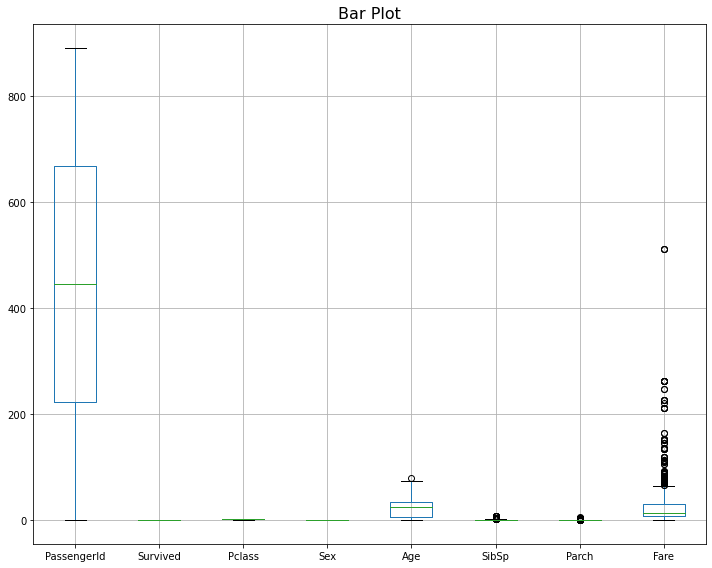

In [10]:
plt.figure(figsize = (10, 8))
datasets.boxplot()     # plot boxplot  
plt.title("Bar Plot", fontsize=16)
plt.tight_layout()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01e5dbb450>,
      dtype=object)

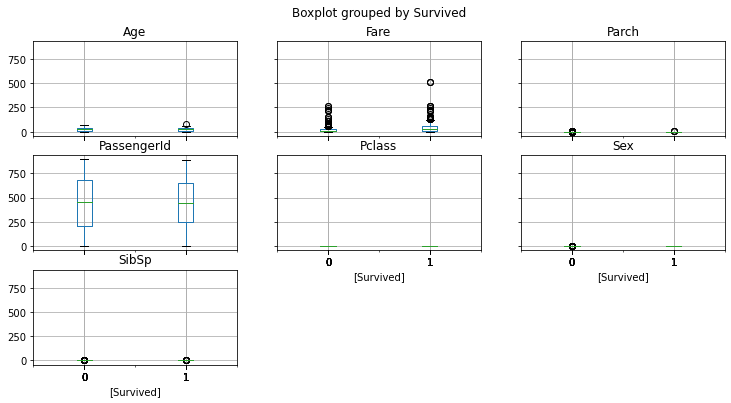

In [11]:
datasets.boxplot(by="Survived", figsize=(12, 6))

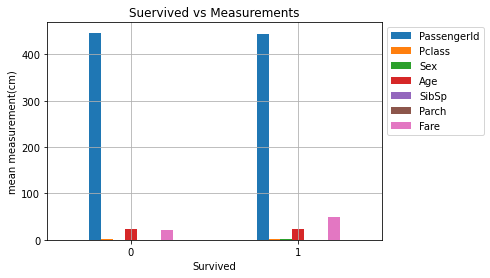

In [12]:
datasets.groupby(by = "Survived").mean().plot(kind="bar")

plt.title('Suervived vs Measurements')
plt.ylabel('mean measurement(cm)')
plt.xticks(rotation=0)  # manage the xticks rotation
plt.grid(True)

# Use bbox_to_anchor option to place the legend outside plot area to be tidy 
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In [13]:
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

model = KMeans(n_clusters=3, random_state=11)
model.fit(X)
print(model.labels_)

[1 2 1 2 1 1 2 0 0 1 0 2 1 0 1 2 0 1 1 1 1 1 1 2 0 0 1 2 1 1 2 2 1 1 2 2 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 2 1 2 1 1 1 0 0 1 2 2 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 2 1 0 0 1 2 1 1 1 2 0 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 2 0 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 2 2 1 2 0 1 1 1 1 1 1 0
 1 1 1 2 1 1 1 2 1 1 1 0 1 1 1 1 0 0 2 0 1 1 2 0 0 1 2 1 0 2 1 1 0 1 0 0 0
 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 1 1
 1 1 2 1 1 1 1 0 2 1 1 0 1 1 1 0 1 1 1 1 1 1 1 2 1 0 2 1 1 0 2 1 0 0 2 2 2
 2 1 0 2 2 1 1 0 1 2 2 1 1 2 2 1 2 1 1 0 0 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1
 1 2 1 2 1 1 1 1 1 2 2 2 1 2 2 2 0 1 1 1 1 1 2 2 1 1 1 0 0 2 1 1 0 2 0 2 2
 1 2 1 2 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 2 1 1 2
 2 1 1 2 0 2 1 2 1 1 2 0 1 2 1 1 0 1 1 1 2 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 2 1 1 1 2 0 1 0 1 1 1 0 1 1 1 1 1 1 2 1 2 1 2 2 0 0 2 1 2 1 1 1
 1 2 1 2 0 2 0 1 2 2 1 1 2 2 2 1 2 1 2 1 1 1 1 2 1 0 1 1 0 1 1 2 1 1 1 1 0
 1 1 1 2 0 2 2 1 1 1 1 2 

In [14]:
datasets['PredSurvived'] =  np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

print("Accuracy :", metrics.accuracy_score(datasets.Survived, datasets.PredSurvived))
print("Classification report :", metrics.classification_report(datasets.Survived, datasets.PredSurvived))

Accuracy : 0.510662177328844
Classification report :               precision    recall  f1-score   support

           0       0.73      0.75      0.74       549
           1       0.41      0.13      0.20       342
           2       0.00      0.00      0.00         0

    accuracy                           0.51       891
   macro avg       0.38      0.29      0.31       891
weighted avg       0.61      0.51      0.53       891



In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
DTC = DecisionTreeClassifier()
DTC.fit(X, y)

DecisionTreeClassifier()

In [17]:
test_data = pd.read_csv('../input/titanic/test.csv')

In [18]:
test_data = test_data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

In [19]:
test_data['Sex'] = np.where(test_data['Sex'] == 'male', 0, test_data['Sex'])
test_data['Sex'] = np.where(test_data['Sex'] == 'female', 1, test_data['Sex'])


In [20]:
test_data.fillna(0, inplace=True)

In [21]:
predict = DTC.predict(test_data)

In [22]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': predict})

output.to_csv('TitanicFinalSubmission.csv', index=False)